# INF283 | Weekly Exercise 02 | Regression

#### Deadline
Sep 07, 2018 | 23:59

#### What to deliver 
You can try out your Python code within this notebook. But you should make a PDF file of answers for each of the tasks, and then submit this PDF file on Mitt UiB.

#### Where to deliver
On [Mitt UiB](https://mitt.uib.no/courses/12791/assignments) in the assignments section.

#### Note to students
This is a Python notebook and all the examples are in Python. You are free to use any programming language you want to do the exercise questions in; we will grade your submissions. But, if you got stuck somewhere, we can provide help for Python only. Moreover, the solution provided after the deadline will also in be in Python.

In case you want to learn Python, you can quickly learn it using these [set of short videos](https://www.youtube.com/watch?v=oVp1vrfL_w4&list=PLQVvvaa0QuDe8XSftW-RAxdo6OmaeL85M).

## Table of Contents:
[1. Univariate Linear Regression](#univariate)
  * [Exercise 1.1](#exercise1_1)

  * [Exercise 1.2](#exercise1_2)

  * [Exercise 1.3](#exercise1_3)

  * [Exercise 1.4](#exercise1_4)

  * [Exercise 1.5](#exercise1_5)

[2. Multivariate Linear Regression](#multivariate)
  
  * [Exercise 2.1](#exercise2_1)
  
  * [Exercise 2.2](#exercise2_2)
  
  * [Exercise 2.3](#exercise2_3)

[3. Logistic Regression](#logistic)

  * [Exercise 3.1](#exercise3_1)


# 1. Univariate Linear Regression <a class="anchor" id="univariate"></a> 
In univariate regression, the response variable is modeled in terms of just one predictor variable. In this section, we will experiment with various ways in which we can perform linear regression.

# Linear Regression with Gradient Descent

In the lecture, you saw the closed-form solution 
$$\hat{w} = (X^TX)^{-1}X^Ty$$
to find the best values of linear regression parameters.
This closed-form solution exists only when the matrix X is invertible. Even if the matrix X is invertible, but is very large in its dimensions, it might not be possible to invert it with the compute resources that you might have at your disposal. In these scenarios, we can use gradient descent to find the best value of parameter estimates.

Gradient descent attempts to find the *best* values for these parameters so that the value of some error function is minimized. We will be using Mean Squared Error (MSE) as our error function, which is the mean of the sum of squared error (SSE). Error functions are also called the loss functions.

This code demonstrates how a gradient descent search may be used to solve the linear regression problem of fitting a line through a set of points. The goal is to model a set of points with a straight line. A straight line is defined by two parameters: the line's slope $w_0$ , and its y-intercept $w_1$ (some texts may denote $w_0$ and $w_1$ as $b$ and $m$, respectively, so don't get confused by the notation). 

$w_0$ and $w_1$ can take on any value, but only certain specific values of $w_0$ and $w_1$ will yield a line that minimizes the sum of squares error between the original points and the line that tries to model these points (refer to this [interactive demo](http://www.dangoldstein.com/regression.html) to get a better understanding of this concept).



In [1]:
# install numpy first. If you have it installed already then pip won't install it
# and you will get requirement already satisfied message. That's normal.
!pip install numpy

distributed 1.21.8 requires msgpack, which is not installed.
You are using pip version 10.0.1, however version 18.0 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [1]:
# To use numpy, we must first import it
import numpy as np

### Finding the mean squared error (MSE) (loss funksjonen)
Now we define a function called `compute_error_for_line_given_points` to find the mean squared error between a line (modeled by parameters `w0` and `w1`) and a set of points to which it tries to model. Mathematically, it is given as:
$$
MSE = \dfrac{1}{n} \sum_{i=1}^{n} [y_i - (w_0 x_i + w_1)]^2 
$$
where `n` is the number of data points.

In [2]:
# We are now going to define a function which takes the parameters (b and m) of 
# a line and then finds the mean-squared error between the user-specified points 
# and the line. 
def compute_error_for_line_given_points(w0, w1, points):
    totalError = 0
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        # accumulate 'sum of square' errors in totalError variable
        totalError += (y - (w1 * x + w0)) ** 2
    # find mean of sum of squared errors    
    mse = totalError/len(points)
    return mse

# N.B.: Students who wish to do this excercise in R should implement this function in R themselves

### Gradient Descent
In gradient descent, we start with some initial values of $w_0$ and $w_1$ and then  refine these crude estimate until we can no longer see an appreciable decrease in the mean squared error. To refine the $w_0$ and $w_1$ estimates, we need to update them (make their values higher or lower) so that the mean squared error gets reduced. Taking partial derivative of MSE with respect to $w_0$ and $w_1$, can tells us whether to increase or decrease the values of these parameter to get an improved fit.


If we take the partial derivative of the MSE function with respect of $w_0$, we get:
$$
\frac{\partial MSE}{\partial w_0} =\frac{\partial}{\partial w_0} \left(\dfrac{1}{n} \sum_{i=1}^{n} [y_i - (w_1 x_i + w_0)]^2\right)
=-\dfrac{2}{n}\left( \sum_{i=1}^{n} y_i - (w_1 x_i + w_0)\right)
$$

If we take the partial derivative of the MSE function with respect of $w_1$, we get:
$$
\frac{\partial MSE}{\partial w_1} =\frac{\partial}{\partial w_1} \left(\dfrac{1}{n} \sum_{i=1}^{n} [y_i - (w_1 x_i + w_0)]^2\right) 
=-\dfrac{2}{n}\left( \sum_{i=1}^{n} x_i[y_i - (w_1 x_i + w_0)]\right)
$$

The gradient $\nabla$ of MSE is just as a vector of these partial derivatives of MSE with respect to $w_0$ and $w_0$:
$$
\nabla MSE(w_0, w_1) = \left(\frac{\partial MSE}{\partial w_0}, \frac{\partial MSE}{\partial w_1}\right)
$$


We can now define the update rule for $w_0$ and $w_1$. Update rule modify the current value of the parameter such that the updated parameter values cause a decrease in the MSE.

Update rule for the weight vector of $w_0$ and $w_1$:
$$
(w_0, w_1)_{t+1} =(w_0, w_1)_{t} - \eta \left(\frac{\partial MSE}{\partial w_0}, \frac{\partial MSE}{\partial w_1}\right)
$$


where $\eta$ is the learning rate.

The `step_gradient` function below shows you how to implement the gradient descent.

In [3]:
def step_gradient(w0_current, w1_current, points, learningRate):
    #initialize the partial derivatives for the cummlative sum
    w0_par_der = 0
    w1_par_der = 0
    
    n = len(points)
    
    # computation for the summation
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        # partial derivative (of MSE) with respect to w0
        w0_par_der += (y - ((w1_current * x) + w0_current))
        # partial derivative (of MSE) with respect to w1
        w1_par_der += x * (y - ((w1_current * x) + w0_current))
        
    # multiplcation of summation results with -2/n
    w0_par_der = -(2/n) * w0_par_der
        # partial derivative (of MSE) with respect to w1
    w1_par_der = -(2/n) * w1_par_der
         
    # make a gradient vector from the partial derivatives    
    gradient_mse = np.array([w0_par_der, w1_par_der])
    
    # make a vector of weights
    weight_vector = np.array([w0_current, w1_current])
    
    # update rule for weights
    updated_weight_vector = weight_vector - (learningRate * gradient_mse)
    
    # return the updated weight vector as a list
    return np.ndarray.tolist(updated_weight_vector)

# N.B. Students who wish to do this excercise in R should implement this function in R themselves

### Running Gradient Descent Iteratively
Gradient descent is an iterative method of improving the parameter estimates. Therefore, we run `step_gradient` function until we reach the absolute minimum of error, or until we have executed the `gradient_step` function a certain number of times, or if the error is small. Here we implement a function called `gradient_descent_runner` that runs the gradient_step function for `num_iterations` times. In the exercise later on, we will ask you to make some changes in this function.

In [4]:
def gradient_descent_runner(points, starting_w0, starting_w1, learning_rate, num_iterations):
    w0 = starting_w0
    w1 = starting_w1
    for i in range(num_iterations):
        w0, w1 = step_gradient(w0, w1, points, learning_rate)
        mse = compute_error_for_line_given_points(w0, w1, points)
        print(f'Iteration {i+1}: w0={w0:0.5f}, w1={w1:0.5f}, mse={mse:0.5f}')
    return [w0, w1, mse]
# N.B.: Students who wish to do this exercise in R should implement this function in R themselves

### Bringing it all together
All the functions we have define above won't do anything unless we call them. But we first need the data. We will generate the data points from a straight line and then add noise to it: 
$$
y = 4 + 3x + noise
$$
The y-intercept ($w_0$) of the line of the line is 4, and the slope ($w_1$) of the line is 3.

We will then use gradient descent to estimate the parameters of the line that generated this noisy linear data. If everything works correctly, then the parameters estimates should be close to the actual values of $w_0$ and $w_1$ used to generate the original data.

The first column is the x values, and the second column contains the y-values.

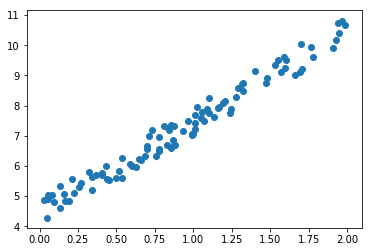

In [5]:
np.random.seed(2)

# generate 100 x values from 0 to 2 randomly, then sort them in ascending order
X = 2 * np.random.rand(100, 1)
X.sort(axis=0)

# generate y values and add noise to it
y = 4 + 3 * X + np.random.rand(100, 1)

# let us plot the data
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(X, y)

In [6]:
# combine the x and y values into a single array called points
points = np.column_stack((X, y))

num_iterations = 20
learning_rate = 0.1
initial_w0 = 0 # initial y-intercept guess
initial_w1 = 0 # initial slope guess
[w0, w1, mse] = gradient_descent_runner(points, initial_w0, initial_w1, learning_rate, num_iterations)

Iteration 1: w0=1.44691, w1=1.50194, mse=20.14308
Iteration 2: w0=2.32806, w1=2.39849, mse=7.47831
Iteration 3: w0=2.86801, w1=2.93046, mse=2.87255
Iteration 4: w0=3.20208, w1=3.24295, mse=1.19394
Iteration 5: w0=3.41183, w1=3.42341, mse=0.57873
Iteration 6: w0=3.54643, w1=3.52453, mse=0.35003
Iteration 7: w0=3.63550, w1=3.57805, mse=0.26199
Iteration 8: w0=3.69691, w1=3.60309, mse=0.22532
Iteration 9: w0=3.74143, w1=3.61118, mse=0.20757
Iteration 10: w0=3.77555, w1=3.60925, mse=0.19693
Iteration 11: w0=3.80321, w1=3.60148, mse=0.18912
Iteration 12: w0=3.82676, w1=3.59037, mse=0.18255
Iteration 13: w0=3.84765, w1=3.57743, mse=0.17664
Iteration 14: w0=3.86674, w1=3.56358, mse=0.17117
Iteration 15: w0=3.88456, w1=3.54934, mse=0.16604
Iteration 16: w0=3.90144, w1=3.53503, mse=0.16122
Iteration 17: w0=3.91758, w1=3.52085, mse=0.15667
Iteration 18: w0=3.93309, w1=3.50690, mse=0.15238
Iteration 19: w0=3.94807, w1=3.49325, mse=0.14833
Iteration 20: w0=3.96257, w1=3.47992, mse=0.14451


## Exercise 1.1 <a class="anchor" id="exercise1_1"></a> 
As you can see, the mean squared error decreases every iteration of gradient descent. Currently the gradient descent runs for 20 iterations. Making changes in the above code so that it now runs for 100 iterations. Observing the mean squared error now. You will see that the mean squared error stops decreasing any further by an appreciable amount after 50 iterations. But since you have specified that the gradient descent should run for 100 iterations, therefore, the program will run for 100 iterations, although the last 50 iterations would be pretty much useless and a waste of your compute resources. In our case, we have a very small dataset, and each iteration takes a very small amount of time, but real-world datasets can be huge, and each iteration of gradient descent will take a considerable amount of time. So you can't afford to run gradient descent if it no longer yields a decrease in the loss.

Your task is to now modify `gradient_descent_runner` function to implement an early stop such that if the improvement in error loss between two consecutive iterations of gradient descent steps is less than a certain user-specified threshold then the algorithm stops, otherwise the algorithm runs for a maximum of `num_iterations`. Name your function as `gradient_descent_runner_early_stop`

Paste the code for modified `gradient_descent_runner_early_stop` function in the block provided below (the code can be Python or R):

##### Answer


In [7]:
def gradient_descent_runner_early_stop(points, starting_w0, starting_w1, learning_rate, num_iterations, threshold):
    w0 = starting_w0
    w1 = starting_w1
    previous_error = compute_error_for_line_given_points(w0, w1, points)
    for i in range(num_iterations):
        w0, w1 = step_gradient(w0, w1, points, learning_rate)
        mse = compute_error_for_line_given_points(w0, w1, points)
        print(f'Iteration {i+1}: w0={w0:0.5f}, w1={w1:0.5f}, mse={mse:0.5f}')
        if ((previous_error - mse) < threshold): break
        previous_error = mse
    return [w0, w1, mse]

In [8]:
# combine the x and y values into a single array called points
points = np.column_stack((X, y))

num_iterations = 100
learning_rate = 0.1
initial_w0 = 0 # initial y-intercept guess
initial_w1 = 0 # initial slope guess
threshold = 0.001
[w0, w1, mse] = gradient_descent_runner_early_stop(points, initial_w0, initial_w1, learning_rate, num_iterations, threshold)

Iteration 1: w0=1.44691, w1=1.50194, mse=20.14308
Iteration 2: w0=2.32806, w1=2.39849, mse=7.47831
Iteration 3: w0=2.86801, w1=2.93046, mse=2.87255
Iteration 4: w0=3.20208, w1=3.24295, mse=1.19394
Iteration 5: w0=3.41183, w1=3.42341, mse=0.57873
Iteration 6: w0=3.54643, w1=3.52453, mse=0.35003
Iteration 7: w0=3.63550, w1=3.57805, mse=0.26199
Iteration 8: w0=3.69691, w1=3.60309, mse=0.22532
Iteration 9: w0=3.74143, w1=3.61118, mse=0.20757
Iteration 10: w0=3.77555, w1=3.60925, mse=0.19693
Iteration 11: w0=3.80321, w1=3.60148, mse=0.18912
Iteration 12: w0=3.82676, w1=3.59037, mse=0.18255
Iteration 13: w0=3.84765, w1=3.57743, mse=0.17664
Iteration 14: w0=3.86674, w1=3.56358, mse=0.17117
Iteration 15: w0=3.88456, w1=3.54934, mse=0.16604
Iteration 16: w0=3.90144, w1=3.53503, mse=0.16122
Iteration 17: w0=3.91758, w1=3.52085, mse=0.15667
Iteration 18: w0=3.93309, w1=3.50690, mse=0.15238
Iteration 19: w0=3.94807, w1=3.49325, mse=0.14833
Iteration 20: w0=3.96257, w1=3.47992, mse=0.14451
Iteratio

## Exercise 1.2<a class="anchor" id="exercise1_2"></a> 
In the program above we had set the learning rate to 0.1. Using the original `gradient_descent_runner` function, first set the number of iterations to 100. Then try to run the code with two different values of learning rates:
1. a learning rate of 0.001
2. a learning rate of 1

Explain what you observe.

##### Answer
<br>
<b>Learning rate 0.001:</b> starts with a higher mse value compared with learning rate 0.1. In addtiton, the loss is decreasing slowly. 
MSE value starts at 54,56 and ends at 24,94 after 100 iterations. 
<br>
<b>Learning rate 1: </b> The mse value is tremendously high compared to the other learning rates, and it gets worse. Starts at 482,98 and ends at 2.4848776110896827998385103280009796032303592589188491... × 10^96

## Exercise 1.3<a class="anchor" id="exercise1_3"></a> 
Earlier in the document, you learned about the closed-form solution of linear regression:
$$
\hat{w} = (X^TX)^{-1}X^Ty
$$
where y is a vector of output values, and X is matrix of input vectors. It is important to note that the y-intercept ($w_0$) is represented by a column of 1's in the X matrix. 

This equation is called the Normal equation, and it can work only if the columns of the matrix X are linear independent, or in other words, the matrix X is invertible.

Once you solve the normal equation, the vector $\bar{w}$ will contain the parameter estimates ($w_0$ and $w_1$) of the line.

Your task is to implement the normal equation, and give it the same values of `X` and `y` as we have used above,
and see what the matrix $\bar{w}$ contains. It should contain the parameter estimates of the fit.

How do the parameter estimates obtained by solving the normal equation compare to the ones obtained using the gradient descent algorithm?

##### Hints: 
1. Add a column of 1's to X to using `np.hstack`. This column of 1's models for the y-intercept ($w_0$). 
2. Use `inv` function in numpy to find the inverse of a matrix. inv is defined in `numpy.linalg` module so will need to import it from it. 
3. To multiply two matrices `a` and `b`, use the following notation in python `a.dot(b)`
4. To transpose a matrix `c` use `c.T`

Students who wish to do this in R instead of Python would find [this resource](https://www.statmethods.net/advstats/matrix.html) useful.

In [9]:
#ANSWER
col = np.ones((X.shape[0],X.shape[1]), dtype=int)
X= np.hstack((col,X)) 
X_trans_X_inv = np.linalg.inv((X.T).dot(X))
ans = X_trans_X_inv.dot(X.T)
ans.dot(y)

array([[4.45478709],
       [3.02129039]])

## Exercise 1.4 <a class="anchor" id="exercise1_4"></a> 
To brush up your calculus skills, derive the partial derivate of MSE that has *L2* penalty term included in it. In other words, we want you compute the following partial derivatives:
$$
\frac{\partial}{\partial w_0} \left(\dfrac{1}{n} \sum_{i=1}^{n} [y_i - (w_1 x_i + w_0)]^2  + \lambda \cdot {w_0}^2 \right) 
=
\underline{-\dfrac{2}{n}\left( \sum_{i=1}^{n} y_i - (w_1 x_i + w_0) + 2 \lambda w_0 \right)}
$$
<br>
$$
\frac{\partial}{\partial w_1} \left(\dfrac{1}{n} \sum_{i=1}^{n} [y_i - (w_1 x_i + w_0)]^2  + \lambda \cdot {w_1}^2 \right) 
=
\underline{-\dfrac{2}{n}\left( \sum_{i=1}^{n} y_i - (w_1 x_i + w_0) + 2 \lambda w_1 \right)}
$$

#### What to submit
A derivation of both the gradient equations. 

# Linear Regression with *sklearn* Machine Learning Library
In the section above, we implemented our own linear regression with gradient descent. However, instead of re-inventing the wheel and writing the code for each machine learning algorithm ourselves, we can also follow the easier path of using someone else's code to do machine learning. That's the path that most people follow. Having said that, knowing how a particular algorithm works internally is a very important for understanding its nuances.

In this section, we will use a machine learning library called sklearn to perform linear regression on the same dataset and see what kind of results we get this time round.

In [134]:
np.random.seed(2)

# generate 100 x values from 0 to 2 randomly, then sort them in ascending order
X = 2 * np.random.rand(100, 1)
X.sort(axis=0)

# generate y values and add noise to it
y = 4 + 3 * X + np.random.rand(100, 1)

In [135]:
# install sklearn if it isn't installed already 
!pip install sklearn

distributed 1.21.8 requires msgpack, which is not installed.
You are using pip version 10.0.1, however version 18.0 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [136]:
# import LinearRegression class from sklearn.linear_model module
from sklearn.linear_model import LinearRegression

# make a lin_reg object form the LinearRegression class
lin_reg = LinearRegression()

# use the fit method of LinearRegression class to fit a straight line through the data
lin_reg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [137]:
print('y-intercept w0:', lin_reg.intercept_)
print('slope w1:', lin_reg.coef_)

y-intercept w0: [4.45478709]
slope w1: [[3.02129039]]


You can see that the estimates for $w_0$ and $w_1$ are very close to the estimates we obtained by using our gradient descent algorithm. Now lets plot the original data along with the fitted line.

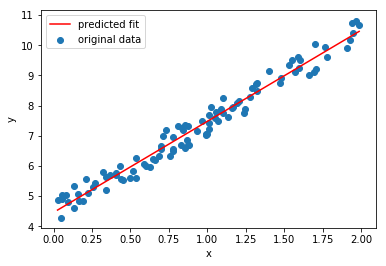

In [138]:
import matplotlib.pyplot as plt
%matplotlib inline

# plot the original data points as a scatter plot
plt.scatter(X, y, label='original data')

# plot the line that fits these points. Use the values of m and b as provided by the fit method
#y_ = lin_reg.coef_*X + lin_reg.intercept_

# you can also get y_ by using the predict method. Uncomment the line below:
y_ = lin_reg.predict(X)

plt.plot(X, y_, color='r', label='predicted fit')
plt.xlabel('x'); plt.ylabel('y')
plt.legend(loc='best')


In [139]:
ans = lin_reg.predict(3)
ans[0][0]

13.518658256328944

## Exercise 1.5<a class="anchor" id="exercise1_5"></a> 
1. How does fit you got from sklearn library compare to the one you got form your implementation of the Normal equation.

2. Suppose you have a new data point `x=3`. 
Use the `predict` method provided by the `LinearRegression` class to find its corresponding y value. 

N.B. Student who prefer R can implement linear regression using `lm()` method.

#### Answer
1) They are identical
<br><b>sklearn</b>: y-intercept w0: [4.45478709], slope w1: [[3.02129039]]
<br><b>Normal equation</b>:array([[4.45478709],
       [3.02129039]])
       
<br>
2) 13.518658256328944


In [145]:
ans = lin_reg.predict(3)
ans[0][0]

13.518658256328944

# 2. Multivariate Linear Regression <a class="anchor" id="multivariate"></a> 

So far we we were using univariate linear regression. Let us now discuss multivariate linear regression. In multivariate regression, the dependent variable is modeled as a linear combination of multiple independent variables. 

To study multivariate regression, we are going to use the Hollywood movies dataset. This dataset is in `movies.csv` file. It has four columns and their description is as following:

- `revenue` = Total revenue obtained in the first year of box office release in millions
- `production_cost` = Total cost in million in producing the movie
- `promotional_cost` = Total cost in millions in promoting the movies	
- `book_sales` = Total sales in millions of the movie's book

We will now try to model the revenue as a linear combination of the production_cost, promotional_cost, and book_sales using Multivariate Linear Regression.

In [146]:
import pandas as pd
import os.path
# make a dataframe of the data


NB_DIR= %pwd
df = pd.read_csv(f'{NB_DIR}/movies.csv')

# show first five rows of df
df.head(n=5)

,revenue,production_cost,promotional_cost,book_sales
0,85.099998,8.5,5.100000,4.7
1,106.300003,12.9,5.800000,8.8
2,50.200001,5.2,2.100000,15.1
3,130.600006,10.7,8.399999,12.2
4,54.799999,3.1,2.900000,10.6


In [147]:
# Extract the first column and set it to the output or dependent varaible y
y = df[['revenue']]

# Remove the first column and set the rest of the dataframe to X. This is the set of indepedent variables
X = df.drop(columns=['revenue'])

# show first five rows of X
X.head(n=5)

,production_cost,promotional_cost,book_sales
0,8.5,5.100000,4.7
1,12.9,5.800000,8.8
2,5.2,2.100000,15.1
3,10.7,8.399999,12.2
4,3.1,2.900000,10.6


In [148]:
# show first five rows of y
y.head(n=5)

,revenue
0,85.099998
1,106.300003
2,50.200001
3,130.600006
4,54.799999


Now we will fit a Multivariate Linear Regression model to it:

In [149]:
from sklearn.linear_model import LinearRegression

# make a lin_reg object form the LinearRegression class
lin_reg = LinearRegression()

# use the fit method of LinearRegression class to fit a straight line through the data
lin_reg.fit(X, y)

# Display the learned parameters
lin_reg.intercept_, lin_reg.coef_

(array([7.67602854]), array([[3.66160401, 7.62105126, 0.82846807]]))

## Exercise 2.1<a class="anchor" id="exercise2_1"></a> 
What would be the first year box office revenue of a movie which costed 23 million dollars to make, 12 million dollars to promote, and had total book sales of 10 million dollars.

N.B: Students you want to attempt this exercise in R can use `lm()` function to do multiple linear regression.

In [150]:
## TODO
## Write your code here
d = {'production_cost': [23], 'promotional_cost': [12], 'book_sales':[10]}
df = pd.DataFrame(data=d)
lin_reg.predict(df)

array([[191.6302165]])

# Multivariate Regression with Polynomial basis
What if your data is actually more complex than a simple straight line, or a plane? Surprisingly, you can actually use a linear model to fit nonlinear data as well. A simple way to do this is to add powers of each feature as new
features, and then train a linear model on this extended set of features. This technique is called Polynomial
Regression. Because we are modeling the response variable as linear combination of the polynomial features, therefore this regression is classed as multivariate regression.

Lets look at an example. First, lets generate some nonlinear data, based on a simple quadratic equation (plus some noise).
$$
y = 0.5X^2 + X + 2 + noise
$$

In [151]:
# define the number of points to generate as k
k = 100

# define a seed value. It is important to define the seed value
# so that the random numbers generated are the same every time
# this code is executed.
np.random.seed(10)

# generate k x-axis values from -3 to +3
X = 6 * np.random.rand(k, 1) - 3

# sort the numbers in ascending order. This helps when we are plotting the data. 
# Without this line, your plots will be all jumbled up
X.sort(axis=0)

# generate k y-axis values
y = 0.5 * X**2 + X + 2 + np.random.rand(k, 1)

Let us now plot the data:

Text(0,0.5,'y')

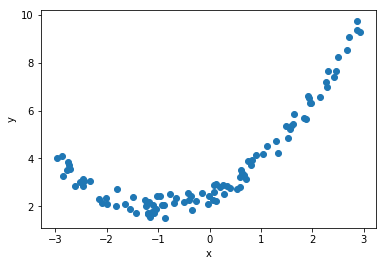

In [152]:
plt.scatter(X, y)
plt.xlabel('x'); plt.ylabel('y')

Clearly, a straight line will never fit this data properly. So lets use Scikit-Learn’s `PolynomialFeatures`
class to transform our training data by adding the square of X in the training set as new feature.

In [153]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)

# generate polyonimal features upto degree 2 from the vector X
X_poly = poly_features.fit_transform(X)

In [154]:
# display 4 original data points 
X[1:5]

array([[-2.8754883 ],
       [-2.84760131],
       [-2.7643094 ],
       [-2.76024475]])

In [155]:
# Display the transformed data.
# You will now see the original X data alongside its corresponding 2nd-degree polynomial feature
X_poly[1:5]

array([[-2.8754883 ,  8.26843299],
       [-2.84760131,  8.10883321],
       [-2.7643094 ,  7.64140644],
       [-2.76024475,  7.61895107]])

Now we fit a linear regression model to the transformed data:

In [156]:
lin_reg = LinearRegression()

# Now we fit a linear model to the X_poly (the transformed features set) and y
lin_reg.fit(X_poly, y)

# show the values of intercept and learned co-efficients
lin_reg.intercept_, lin_reg.coef_

(array([2.48183064]), array([[0.99509291, 0.49139048]]))

So the fit estimated by polynomial regression has the following form:

$$
\bar{y} = 0.49X^2 + 0.99X + 2.48
$$

which is pretty close the function we used to generate the original the original data:
$$
y = 0.5X^2 + X + 2 + noise
$$

(N.B.: The values that you might get for `lin_reg.intercept_` and `lin_reg.coef_` may be a bit different. This is because you might be using a different computer with a different operating system, different precision etc. All this might lead a slightly different values of intercept and co-efficients.)

Let's now plot the original data (in blue) and the predicted fit (in red):

Text(0,0.5,'y')

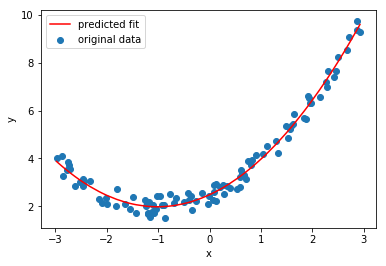

In [157]:
y_ = lin_reg.predict(X_poly)
    
plt.scatter(X, y, label='original data')
plt.plot(X, y_, color='r', label='predicted fit')
plt.legend(loc='best')

plt.xlabel('x')
plt.ylabel('y')

##### Try it yourself
Change the value of polynomial degree, and see what happens to the fitted line.

Try values of 5, 10, and 15. You don't need to submit anything for this one.

### Regularization with Ridge Penalty

As you might have noticed from the above task, as the degree of polynomial increases, the model starts to overfit. Model overfitting often happens when you have:
- lots of features, and 
- too little data per feature. 

The model starts memorizing the data, rather than generalizing.

To prevent model from overfitting, we can do regularization. In regularization, we add a penalty term to the loss function. This penalty term prevents the model from overfitting.

Here, we will write the code for Ridge regression.


/home/sathiesh/.conda/envs/fastai/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number9.211481e-17
  overwrite_a=True).T


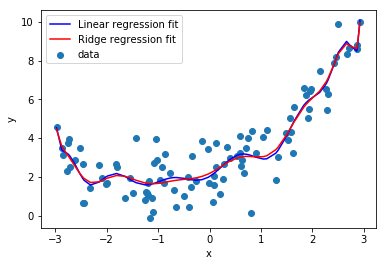

In [160]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# define the number of points to generate
k = 100
np.random.seed(10)

# generate k x-axis values from -3 to +3
X = 6 * np.random.rand(k, 1) - 3
X.sort(axis=0)

# generate k y-axis values
y = 0.5 * X**2 + X + 2 + np.random.randn(k, 1)

# Create polynomial feature (degree 15)
poly_features = PolynomialFeatures(degree=15, include_bias=False)
X_poly = poly_features.fit_transform(X)

# Create Ridge regression object from Ridge class
ridge_reg = Ridge(alpha=0.05) #egentlig 5
# Fit data using Ridge regression
ridge_reg.fit(X_poly, y)

# Create Linear regression object from LinearRegress class (this is just for comparison)
lin_reg = LinearRegression()
# Fit data using Linear regression
lin_reg.fit(X_poly, y)

y_predict_ridge = ridge_reg.predict(X_poly)
y_predict_linear = lin_reg.predict(X_poly)

plt.scatter(X, y, label='data')
plt.plot(X, y_predict_linear, color='b', label='Linear regression fit')
plt.plot(X, y_predict_ridge, color='r', label='Ridge regression fit')

plt.xlabel('x')
plt.ylabel('y')

plt.legend(loc='best')

As you can see in the plot above, linear regression leads to overfitting (jiggly blue fit in the plot above).

Ridge regression with `alpha=5` yields a fit that isn't overfitted (smooth red curve).

## Exercise 2.2<a class="anchor" id="exercise2_2"></a> 
Change the value of regularization parameter to 0.05 and see what happens. Explain what you observe?

N.B. Students who wish to do this exercise in R can use the `lm.ridge()` function.

##### Answer
When we change the value to 0.05 it becomes similar to the linear model, so it overfits. 

# Linear Regression with Radial Basis Functions
In the lecture, you learned about the radial basis functions (RBF). A radial basis function is a real-valued function whose value depends only on the distance from some point `c` called a center. We can use each point of our data as center of an RBF and then use a weighted sums of these radial basis functions to approximate the fit for the original data. In this case multivariate linear regression can be used to find the weights (or coefficients) of this weighted sum of `m` radial basis functions, where `m` are the number of data points in the dataset for which we want to find a fit.

Here you will see an implementation of multivariate linear regression with radial basis functions.

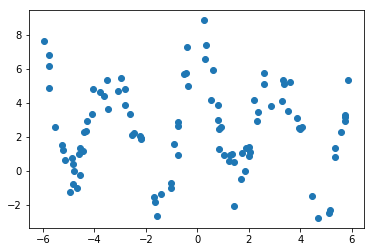

In [34]:
# Set random seed
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)
m = 100

# Create random set of m x values between -6 and +6
X = np.random.rand(m, 1)*12 - 6
X.sort(axis =0)

# Create a non-linear dataset with random noise
y = 0.5*np.cos(X) + np.sin(X) + 4*np.cos(2*X) + np.exp(np.cos(3*X)) + 3*np.random.rand(m,1) 

# plot it
plt.scatter(X, y)

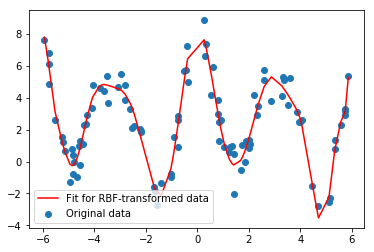

In [43]:
from sklearn.metrics.pairwise import rbf_kernel 
from sklearn.linear_model import LinearRegression

# find the transformation of X using Radial Basis Functions 
# Each point in X is now modeled as vector of 100 values. 
# See the X_RBF.shape and X_RBF to find how rbf_kernel transformed 
# the original datapoints
X_RBF = rbf_kernel(X, X, gamma=0.1) #TODO se på hva gamme parameteren gjør 

# Fit a linear regression model to the RBF-transformed data
clf = LinearRegression()
clf.fit(X_RBF, y)

# find the predicted values
y_= clf.predict(X_RBF)

# plot original data and predicted fit
plt.scatter(X, y, label='Original data')
plt.plot(X, y_, color='r', label='Fit for RBF-transformed data')
plt.legend(loc='best')

## Exercise 2.3<a class="anchor" id="exercise2_3"></a> 
Plot the first 0th, 99th, and 49th radial basis of X on the same plot as a line graph.

##### HINT:
X_RBF contains 100 radial basis functions, corresponding to each of the 100 data points. All you need to do is to index them, and then plot them.

N.B.: Students who wish to do this exercise in R should refer to this [resource for RBF](http://www.di.fc.ul.pt/~jpn/r/rbf/rbf.html).

Paste your code in the cell below:

In [46]:
ans = np.array([X_RBF[0],X_RBF[49] ,X_RBF[99]])

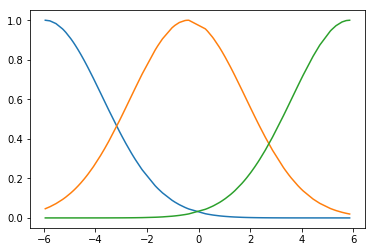

In [48]:
plt.plot(X, ans.T)
plt.show()

# 3. Logistic Regression <a class="anchor" id="logistic"></a> 

Logistic Regression (also called Logit Regression) is a generalized linear model which is commonly used to estimate the probability that an instance belongs to a particular class (e.g., what is the probability that this email is spam?). If the estimated probability is greater than 0.5, then the model predicts that the instance belongs to that class (called the positive class, labeled “1”), or else it predicts that it does not (i.e., it belongs to the negative class, labeled “0”). This makes it a binary classifier.

Let’s use the iris dataset to illustrate Logistic Regression. This is a famous dataset that contains the sepal
and petal length and width of 150 iris flowers of three different species: Iris-Setosa, Iris-Versicolor, and
Iris-Virginica.
![image](https://cdn-images-1.medium.com/max/720/1*7bnLKsChXq94QjtAiRn40w.png)
![image](http://www.robosoup.com/wp-content/uploads/2016/02/iris_petal_sepal-278x300.png)

Iris data is already present in the sklearn library, and is essentially the same as the one you used during your first weekly exercise. All we need to do is to import it.

In [49]:
from sklearn import datasets
iris = datasets.load_iris()

# iris is a dictionary of key-value pairs. Each key-value pairs contains some information about the dataset.
# Lets display a list of these keys and see what they hold
list(iris.keys())

['data', 'target', 'target_names', 'DESCR', 'feature_names']

- `data`: holds the data of sepal and petal lengths and widths in four columns,
- `target`: holds the class of each flower. These class are encoded as 0, 1, and 2,
- `target_names`: holds the names of each of the flower classes,
- `DESCR`: contains a detailed description of the dataset, and
- `feature_names`: contains a list of name of the columns of data

In [50]:
# let us get the petal width. It is present in the 4th column of data
X = iris["data"][:, 3:] 
X.sort(axis=0)

# lets define a binaray variable that encodes whether a flower is Iris-Virginca or not
# Iris_virginca flower is encoded as a 2 in target  
y = (iris["target"] == 2).astype(np.int) # 1 if Iris-Virginica, else 0

Text(0,0.5,'Iris-Virginica(1) \n Not Iris-Virginica(0)')

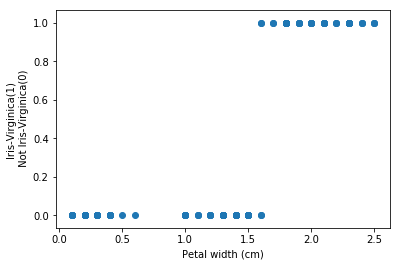

In [51]:
plt.scatter(X, y)
plt.xlabel('Petal width (cm)')
plt.ylabel('Iris-Virginica(1) \n Not Iris-Virginica(0)')

Let us first try the naive thing of fitting a linear model to this data.

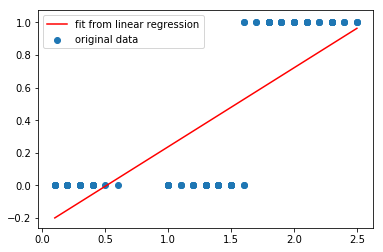

In [52]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
y_ = lin_reg.predict(X)

plt.scatter(X, y, label='original data')
plt.plot(X, y_, color='r', label='fit from linear regression')
plt.legend(loc='best')

A linear regression model cannot be an optimal fit for such dichotomous data. Lets try now to fit a logistic regression model to this data.

In [53]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

Let’s now look at the model’s estimated probabilities for flowers with petal widths varying from 0 to 3 cm

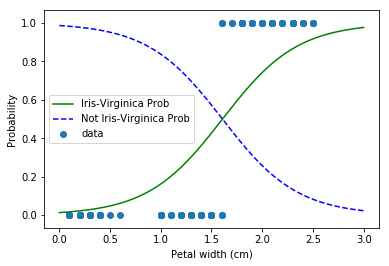

In [54]:
# we generate X_new which is vector of closely spaced points form 0 to 3
# This vector will help us plot the model
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)

# make a vector of prediction probablity values for all datapoints in X_new
y_proba = log_reg.predict_proba(X_new)

plt.plot(X_new, y_proba[:, 1], "g-", label="Iris-Virginica Prob")
plt.plot(X_new, y_proba[:, 0], "b--", label="Not Iris-Virginica Prob")
plt.scatter(X, y, label='data')

plt.xlabel('Petal width (cm)')
plt.ylabel('Probability')
plt.legend(loc='best')

The petal width of Iris-Virginica flowers ranges from 1.4 cm to 2.5 cm, while the other iris flowers generally have a smaller petal width, ranging from 0.1 cm to 1.8 cm. 

Notice that there is a bit of overlap. Above about 2 cm the classifier is highly confident that the flower is an Iris-Virginica (it outputs a high probability to that class), while below 1 cm it is highly confident that it is not an Iris-Virginica (high probability for the “Not Iris-Virginica” class). In between these extremes, the classifier is unsure. However, if you ask it to predict the class (using the `predict()` method rather than the `predict_proba()` method), it will return whichever class is the most likely. Therefore, there is a decision boundary at around 1.6 cm where both probabilities are equal to 0.5 (or 50%): if the petal width is higher than 1.6 cm, the classifier will predict that the flower is an Iris-Virginica, or else it will predict that it is not (even if it is not very confident).

Let's try to predict the class of a flower that has a petal width of 1.7.

In [55]:
log_reg.predict([[1.7]])

array([1])

So the class predicted is 1 or Iris-Virginica. Let us find out how sure the classifier was while making this decision.

In [56]:
log_reg.predict_proba([[1.7]])

array([[0.43834057, 0.56165943]])

So the classifier was about 56% sure that the flower is Iris-Virginica.

## Exercise 3.1<a class="anchor" id="exercise3_1"></a> 
In the example above, we discussed a two class classification problem i.e, we built a logistic regression classifier that was able to distinguish between Iris-Virginica and non-Iris-Virginica flowers based on just a single feature: the petal width.

Your task now is build a multi-class classifier that can distinguish between Iris-Virginca, Iris-Setosa, and Iris-Versicolor. Furthermore, instead of using one feature, now you have to use two features — petal length and petal width — to train your model.

Using the model that you trained, predict the most probable class for a flower that has petal length and width of 1 and 0.1 cm, respectively. What is probability value of this most probable class.

For those who prefer to work in R, you can use the `glm()` function to perform logistic regression. More on it [here](https://www.datacamp.com/community/tutorials/logistic-regression-R). 

##### Hint:
1. Make an object from LogisticRegression class in sklearn as following: 

`multiclass_logreg_obj = LogisticRegression(multi_class="multinomial",solver="lbfgs", C=10)`.

`multiclass_logreg_obj` is just a name. It could be any (appropriate) name you like.

Read more about the Logistic Regression parameters in the [online documentation](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html). Understanding C, solver, and multi_class is important for this assignment.

In [57]:
iris['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [58]:
X = iris['data'][:,[2,3]]

In [59]:
y = iris['target'] 

In [60]:
X.shape

(150, 2)

In [88]:
multiclass_logreg_obj = LogisticRegression(multi_class="multinomial",solver="lbfgs", C=10)
multiclass_logreg_obj.fit(X, y)
y_ = multiclass_logreg_obj.predict(X)

In [89]:
X.shape, y.shape

((150, 2), (150,))

In [116]:
ans = multiclass_logreg_obj.predict(np.array([[1,0.1]]))

In [118]:
prob = multiclass_logreg_obj.predict_proba(np.array([[1,0.1]]))

0

In [ ]:
print('Class: '+ str(ans[0])+ ', Name: ' + iris['target_names'][0])

In [ ]:
print('Probability: ' + str(prob[0][ans[0]]) + '%')

### Sources 
1. https://github.com/mattnedrich/GradientDescentExample/blob/master/gradient_descent_example.py
2. Hands-On Machine Learning with Scikit-Learn and TensorFlow by Aurélien Géron

For further details on linear regression, we recommend watching the Linear Regression lectures in the Machine Learning Course by Andrew Ng on Coursera.